# PANDAS
本章提供Pandas常用操作!

## 目錄
0. 目錄
1. 首先匯入資料
    1. 資料讀取
        1. CSV
    2. 產生資料
        1. Series
            1. 不指定index
            2. 指定index
        2. DataFrame(表格)
2. 檢視資料
    1. 檢視資料狀態
    2. 檢視變數型態
    3. 設定欄位名稱
    4. 變更變數型態
    5. 檢視前幾筆資料
    6. 檢視後幾筆資料
    7. 檢視特定欄位
    8. 檢視第N筆資料
    9. 檢視第N~M筆資料
3. 篩選
    1. 以特定欄位條件篩選資料, 並存成DF
4. 資料分組
    1. 以某欄位做為Key, 並對Data做運算
5. 繪圖
    1. Series.plot()之參數
    2. DataFrame.plot()之參數
    3. 折線圖
        1. Series
        2. DataFrame
    4. 柱狀圖
        1. Series
        2. DataFrame
    5. 柱狀堆疊圖
        1. DataFrame
    6. 正規化柱狀堆疊圖
        1. DataFrame
6. 數據分析-時間篇
    1. 數據前處理
    2. 獲取特定時間資料
        1. 按年度獲取
        2. 按月份獲取資料
        3. 按日獲取資料
        4. 獲取某個時段之前/之後資料
    3. 以日期做統計資料
        1. 按週計算
        2. 按月計算
        3. 按季計算
        4. 按年計算

## <span id = "1">首先匯入資料</span>

### <span id = "1.1">資料讀取</span>

#### <span id = "1.1.1">CSV</span>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv')

### <span id = "1.2">產生資料</span>

#### <span id = "1.2.1">Series</span>

##### <span id = "1.2.1.1">不指定index</span>

In [2]:
s1 = pd.Series([1, 3, 6, np.nan, 44, 1]) #不指定index
s1

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64

##### <span id = "1.2.1.2">指定index</span>

In [3]:
s2 = pd.Series([1, 2, 3], index={'a', 'b', 'c'}) #指定index
s2

c    1
b    2
a    3
dtype: int64

#### <span id = "1.2.2">DataFrame(表格)</span>

In [4]:
s1 = pd.Series([1, 1, 2, 1, 2, 2, 3])
s2 = pd.Series([201301, 201301, 201301, 201302, 201302, 201302, 201302])
table = pd.DataFrame(
    {
        'CLIENTCODE': s1,
        'YEARMONTH': s2
    })
table

,CLIENTCODE,YEARMONTH
0,1,201301
1,1,201301
2,2,201301
3,1,201302
4,2,201302
5,2,201302
6,3,201302


## <span id = "2">檢視資料</span>

### <span id = "2.1">檢視資料狀態</span>

In [5]:
df.shape #可以知道有多少比資料/變數, 代表31筆資料, 以及3個變數.

(999, 2)

### <span id = "2.2">檢視變數型態</span>

In [6]:
df.info() #檢查變數為哪種型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
2015-10-23    999 non-null object
51            999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


### <span id = "2.3">設定欄位名稱</span>

In [7]:
df.columns = ['date','number']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
date      999 non-null object
number    999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


### <span id = "2.4">變更變數型態</span>

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.head(2)

,date,number
0,2016-11-29,38
1,2002-02-06,84


### <span id = "2.5">檢視前幾筆資料</span>

In [9]:
df.head() #預設列出前五筆資料, 若要顯示前N筆: dr.head(N)

,date,number
0,2016-11-29,38
1,2002-02-06,84
2,2017-06-06,59
3,2010-03-29,24
4,2015-03-23,94


### <span id = "2.6">檢視後幾筆資料</span>

In [10]:
df.tail() #預設列出最後五筆資料, 若要顯示最後N筆: dr.tail(N)

,date,number
994,2013-12-08,84
995,2014-05-11,20
996,2013-10-03,52
997,2006-12-28,37
998,2009-05-02,56


### <span id = "2.7">檢視特定欄位</span>

In [11]:
df['number'].head() #取特定欄位的前五筆資料

0    38
1    84
2    59
3    24
4    94
Name: number, dtype: int64

### <span id = "2.8">檢視第N筆資料</span>

In [12]:
df.loc[3] #顯示第4筆資料的資訊, 其中資料從0開始

date      2010-03-29 00:00:00
number                     24
Name: 3, dtype: object

### <span id = "2.9">檢視第N~M筆資料</span>

In [13]:
df.loc[0:2, ['date', 'number']] #顯示特定幾筆/欄位的資料

,date,number
0,2016-11-29,38
1,2002-02-06,84
2,2017-06-06,59


## <span id = "3">篩選</span>

### <span id = "3.1">以特定欄位條件篩選資料, 並存成DF</span>

In [14]:
df[df['number'] == 3] #提供條件, 篩選符合的資料

,date,number
182,2001-11-14,3
222,2009-08-26,3
253,2009-12-31,3
466,2003-08-09,3
612,2016-12-08,3
821,2010-02-13,3
842,2011-06-18,3
859,2007-12-11,3
862,2007-10-25,3
905,2017-10-30,3


## <span id = "4">資料分組</span>

### <span id = "4.1">以某欄位做為Key, 並對Data做運算</span>

In [15]:
data = df.groupby('date')['number'].sum()
# ['ShopId'].count() #將特定資料作為index算特定欄位的總和
data.head()

date
2001-03-05    48
2001-03-16    85
2001-04-03    99
2001-04-07    75
2001-04-10    27
Name: number, dtype: int64

若要再存成dataFrame(or Series)

In [16]:
df_ShopId = pd.DataFrame(data)
df_ShopId.head()

,number
date,
2001-03-05,48
2001-03-16,85
2001-04-03,99
2001-04-07,75
2001-04-10,27


## <span id = "5">繪圖</span>

In [17]:
import matplotlib.pyplot as plt

### <span id = "5.1">Series.plot()之參數</span>

* **kind**: *str*  
        決定圖表型態.
    * line
    * bar 
    * barh
    * hist
    * box
    * kde
    * density
    * area
    * pie
* **ax**: *matplotlib axes object*
* **figsize**: *(width, height)*, 
        調整圖片大小.
* **use_index**: *boolean, default True*, 
        將索引當作刻度標籤.
* **title**: *str or list*, 
        圖表標題.
* **grid**: *boolean, default None (matlab style default)*, 
        顯示網格.
* **legend**: *False/True/'reverse'*, 
        顯示數值標籤.
* **style**: *list or dict*, 
        圖表的風格.
* **logx**: *boolean, default False*, 
        x軸使用對數尺度.
* **logy**: *boolean, default False*, 
        y軸使用對數尺度.
* **loglog**: *boolean, default False*, 
        兩軸都取對數.
* **xticks**: *sequence*, 
        用作x軸刻度的值.
* **yticks**: *sequence*, 
        用作y軸刻度的值.
* **xlim**: *2-tuple/list*, 
        x軸的界限, 例如:[0, 10].
* **ylim**: *2-tuple/list*,
        y軸的界限, 例如:[0, 10].
* **rot**: *int*, 
        旋轉刻度標籤.
* **fontsize**: *int, default None*, 
        Font size for xticks and yticks
* **colormap**: *str or matplotlib colormap object, default None*, 
        Colormap to select colors from. If string, load colormap with that name from matplotlib.
* **colorbar**: *boolean, optional*, 
        If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)
* **position**: *float*, 
        Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center).
* **yerr**: *DataFrame, Series, array-like, dict and str*, 
        See Plotting with Error Bars for detail.
* **xerr**: 
        same types as yerr.
* **label**: *label argument to provide to plot*
* **secondary_y**: *boolean or sequence of ints, default False*, 
        If True then y-axis will be on the right.
* **mark_right**: *boolean, default True, When using a secondary_y axis*, 
        automatically mark the column labels with “(right)” in the legend.
* **kwds**: *keywords, Options to pass to matplotlib plotting method.*
* **alpha**: *int: 0~1*, 
        資料曲線的透明度.

### <span id = "5.2">DataFrame.plot()之參數</span>

* **kind**: *str*  
        決定圖表型態.
    * line
    * bar 
    * barh
    * hist
    * box
    * kde
    * density
    * area
    * pie
    * scatter
    * hexbin
* **ax**: *matplotlib axes object, default None*
        指定在subplot裡的位置, 方法如範例.
* **subplots**: *boolean, default False*,
        將各個資料繪製到單獨的subplot中.
* **sharex**: *boolean, default True if ax is None else False*
        x軸刻度同步.
* **sharey**: *boolean, default False*
        y軸刻度同步.
* **layout**: *tuple (optional)*
        (rows, columns) for the layout of subplots
* **figsize**: *(width, height)*, 
        調整圖片大小.
* **use_index**: *boolean, default True*, 
        將索引當作刻度標籤.
* **title**: *str or list*, 
        圖表標題.
* **grid**: *boolean, default None (matlab style default)*, 
        顯示網格.
* **legend**: *False/True/'reverse'*, 
        顯示數值標籤.
* **style**: *list or dict*, 
        圖表的風格.
* **logx**: *boolean, default False*, 
        x軸使用對數尺度.
* **logy**: *boolean, default False*, 
        y軸使用對數尺度.
* **loglog**: *boolean, default False*, 
        兩軸都取對數.
* **xticks**: *sequence*, 
        用作x軸刻度的值.
* **yticks**: *sequence*, 
        用作y軸刻度的值.
* **xlim**: *2-tuple/list*, 
        x軸的界限, 例如:[0, 10].
* **ylim**: *2-tuple/list*,
        y軸的界限, 例如:[0, 10].
* **rot**: *int, default None*, 
        旋轉刻度標籤.
* **fontsize**: *int, default None*, 
        Font size for xticks and yticks
* **colormap**: *str or matplotlib colormap object, default None*, 
        Colormap to select colors from. If string, load colormap with that name from matplotlib.
* **colorbar**: *boolean*, 
        If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)
* **position**: *float*, 
        Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center).
* **yerr**: *DataFrame, Series, array-like, dict and str*, 
        See Plotting with Error Bars for detail.
* **xerr**: 
        same types as yerr.
* **stacked**: *boolean, default False in line and bar plots, and True in area plot.* 
        繪製堆疊圖.
* **sort_columns**: *boolean, default False*,
        Sort column names to determine plot ordering
* **secondary_y**: *boolean or sequence of ints, default False*, 
        If True then y-axis will be on the right.
* **mark_right**: *boolean, default True, When using a secondary_y axis*, 
        automatically mark the column labels with “(right)” in the legend.
* **kwds**: *keywords, Options to pass to matplotlib plotting method.*
* **alpha**: *int: 0~1*, 
        資料曲線的透明度.

### <span id = "5.3">折線圖</span>

#### <span id = "5.3.1">Series</span>

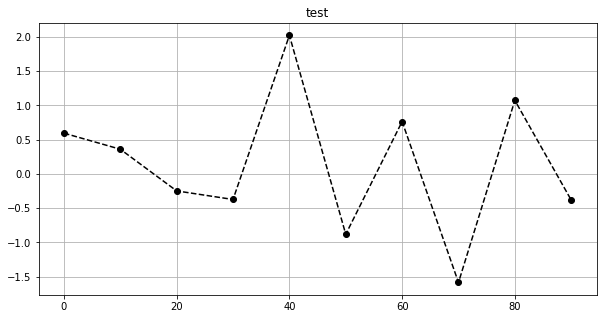

In [18]:
s = pd.Series(np.random.randn(10),index=np.arange(0,100,10))
s.plot(style='ko--', grid=True, title='test', figsize=(10,5))

#### <span id = "5.3.2">DataFrame</span>

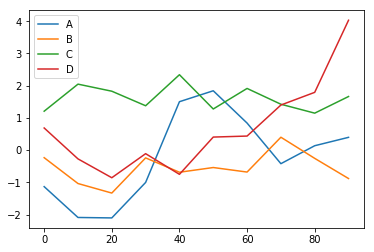

In [19]:
df1=pd.DataFrame(np.random.randn(10,4).cumsum(0),
             columns=['A','B','C','D'],
             index=np.arange(0,100,10))
df1.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258912EEC88>,
      dtype=object)

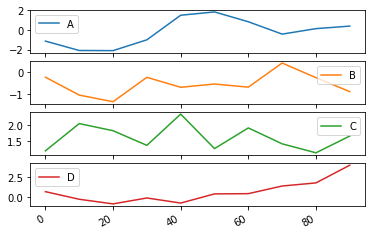

In [20]:
df1.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258913924E0>,
      dtype=object)

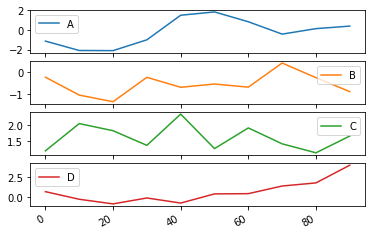

In [21]:
df1.plot(subplots=True, sharex=True)

### <span id = "5.4">柱狀圖</span>

#### <span id = "5.4.1">Series</span>

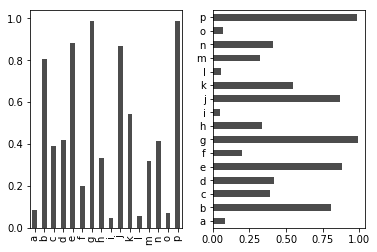

In [22]:
fig, axes = plt.subplots(1, 2) #兩圖顯示在一起
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

#### <span id = "5.4.2">DataFrame</span>

Genus         A         B         C         D
one    0.364686  0.876350  0.878997  0.717610
two    0.142544  0.421775  0.115082  0.838867
three  0.732691  0.171332  0.613970  0.168457
four   0.934460  0.392709  0.034521  0.524989
five   0.636408  0.655553  0.632923  0.611408
three  0.213323  0.528152  0.538034  0.251885


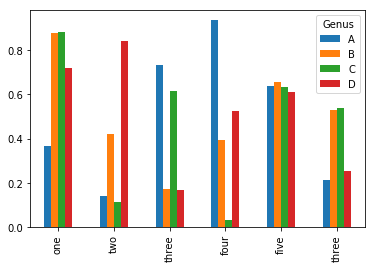

In [23]:
df2=pd.DataFrame(np.random.rand(6,4),
              index=['one','two','three','four','five','three'],
              columns=pd.Index(['A','B','C','D'],name='Genus'))
print(df2)
df2.plot(kind='bar')

### <span id = "5.5">柱狀堆疊圖</span>

#### <span id = "5.5.1">DataFrame</span>

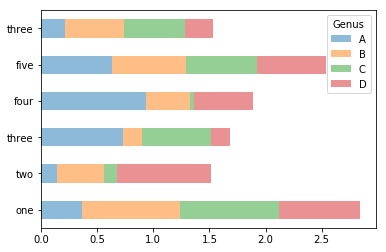

In [24]:
df2.plot(kind='barh',stacked=True,alpha=0.5)

### <span id = "5.6">正規化柱狀堆疊圖</span>

#### <span id = "5.6.1">DataFrame</span>

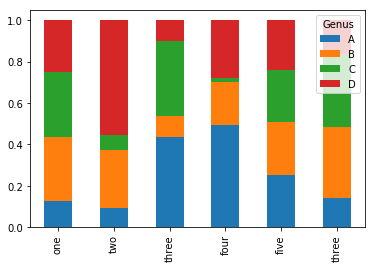

In [25]:
df2_pacts = df2.div(df2.sum(1).astype(float), axis=0)
df2_pacts.plot(kind='bar',stacked=True)

## <span id = "6">數據分析-時間篇</span>

### <span id = "6.1">數據前處理</span>

先讀取資料並將時間資料轉換成datetime, 並將時間資料設為index.

In [26]:
df1 = pd.read_csv('data.csv', header=None)
print(df1.head(2))

            0   1
0  2015-10-23  51
1  2016-11-29  38


In [27]:
df1.columns = ['date','number']

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
date      1000 non-null object
number    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [29]:
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('date') # date欄位設為index
print(df1.head(2))

            number
date              
2015-10-23      51
2016-11-29      38


### <span id = "6.2">獲取特定時間資料</span>

#### <span id = "6.2.1">按年度獲取</span>

In [30]:
print('---------獲取2017年數據-----------')
print(df1['2017'].head(2))
print('-------獲取2016-2017年數據-------')
print(df1['2016':'2017'].head(2))

---------獲取2017年數據-----------
            number
date              
2017-06-06      59
2017-08-17      99
-------獲取2016-2017年數據-------
            number
date              
2016-11-29      38
2017-06-06      59


#### <span id = "6.2.2">按月份獲取資料</span>

In [31]:
print('---------獲取11月資料-----------')
print(df1['2017-11'])
print('-------獲取10~11月資料-----------')
print(df1['2017-10':'2017-11'])

---------獲取11月資料-----------
            number
date              
2017-11-24      51
2017-11-04      80
2017-11-28      58
-------獲取10~11月資料-----------
            number
date              
2017-10-16      94
2017-11-24      51
2017-10-07      90
2017-11-04      80
2017-11-28      58
2017-10-07      90
2017-10-21      30
2017-10-18      88
2017-10-20       5
2017-10-25      44
2017-10-30       3


#### <span id = "6.2.3">按日獲取資料</span>

In [32]:
print('---------獲取11/3資料-----------')
print(df1['2017-11-3'])
print('-------獲取11/3~11/5資料-----------')
print(df1['2017-11-3':'2017-11-5'])

---------獲取11/3資料-----------
Empty DataFrame
Columns: [number]
Index: []
-------獲取11/3~11/5資料-----------
            number
date              
2017-11-04      80


#### <span id = "6.2.4">獲取某個時段之前/之後資料</span>

記得要先排序!

In [33]:
df1_sort = df1.sort_index()

In [34]:
print('---------獲取某個時段之前/之後資料-----------')
print('--------after------------')
print(df1_sort.truncate(after = '2001-04'))
print('--------before------------')
print(df1_sort.truncate(before = '2017-12'))

---------獲取某個時段之前/之後資料-----------
--------after------------
            number
date              
2001-03-05      48
2001-03-16      85
--------before------------
            number
date              
2017-12-04      22
2017-12-09      77
2017-12-28      75
2017-12-29      16


### <span id = "6.3">以日期做統計資料</span>

#### <span id = "6.3.1">按週計算</span>

In [35]:
print(df1.resample('w').sum().head(2))
print('----顯示幾日到幾日')
print(df1.resample('w').sum().to_period('w').head(2))

            number
date              
2001-03-11      48
2001-03-18      85
----顯示幾日到幾日
                       number
date                         
2001-03-05/2001-03-11      48
2001-03-12/2001-03-18      85


#### <span id = "6.3.2">按月計算</span>

In [36]:
print('------日期以月初顯示------')
print(df1.resample('MS').sum().head(2))
print('------日期以月底顯示------')
print(df1.resample('M').sum().head(2))
print('------日期顯示至月份------')
print(df1.resample('M').sum().to_period('M').head(2))

------日期以月初顯示------
            number
date              
2001-03-01     133
2001-04-01     435
------日期以月底顯示------
            number
date              
2001-03-31     133
2001-04-30     435
------日期顯示至月份------
         number
date           
2001-03     133
2001-04     435


#### <span id = "6.3.3">按季計算</span>

In [37]:
print('------日期以季初顯示------')
print(df1.resample('QS').sum().head(2))
print('------日期以季末顯示------')
print(df1.resample('Q').sum().head(2))
print('------日期顯示至季------')
print(df1.resample('Q').sum().to_period('Q').head(2))

------日期以季初顯示------
            number
date              
2001-01-01     133
2001-04-01    1361
------日期以季末顯示------
            number
date              
2001-03-31     133
2001-06-30    1361
------日期顯示至季------
        number
date          
2001Q1     133
2001Q2    1361


#### <span id = "6.3.4">按年計算</span>

In [38]:
print('------日期以年初顯示------')
print(df1.resample('AS').sum().head(2))
print('------日期以年末顯示------')
print(df1.resample('A').sum().head(2))
print('------日期顯示至年份------')
print(df1.resample('A').sum().to_period('A').head(2))

------日期以年初顯示------
            number
date              
2001-01-01    3375
2002-01-01    3153
------日期以年末顯示------
            number
date              
2001-12-31    3375
2002-12-31    3153
------日期顯示至年份------
      number
date        
2001    3375
2002    3153
